
===== Tuning learning rate for linear =====

=== Training linear_lr_0.0001 (356 params) ===
[linear_lr_0.0001] Epoch 01 | Train Loss: 0.6768 Acc: 0.7522 | Eval Train Acc: 0.8465 | Eval Val Acc: 0.8504
[linear_lr_0.0001] Epoch 02 | Train Loss: 0.5414 Acc: 0.8666 | Eval Train Acc: 0.8805 | Eval Val Acc: 0.8759
[linear_lr_0.0001] Epoch 03 | Train Loss: 0.4732 Acc: 0.8900 | Eval Train Acc: 0.8986 | Eval Val Acc: 0.8971
[linear_lr_0.0001] Epoch 04 | Train Loss: 0.4263 Acc: 0.9071 | Eval Train Acc: 0.9107 | Eval Val Acc: 0.9129
[linear_lr_0.0001] Epoch 05 | Train Loss: 0.3906 Acc: 0.9170 | Eval Train Acc: 0.9200 | Eval Val Acc: 0.9262
[linear_lr_0.0001] Epoch 06 | Train Loss: 0.3627 Acc: 0.9231 | Eval Train Acc: 0.9274 | Eval Val Acc: 0.9263
[linear_lr_0.0001] Epoch 07 | Train Loss: 0.3408 Acc: 0.9273 | Eval Train Acc: 0.9313 | Eval Val Acc: 0.9267
[linear_lr_0.0001] Epoch 08 | Train Loss: 0.3235 Acc: 0.9301 | Eval Train Acc: 0.9335 | Eval Val Acc: 0.9298
[linear_lr_0.0001] Epoch 09 | Train

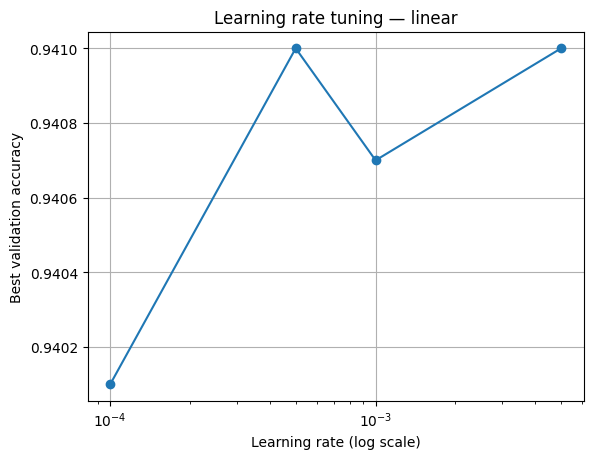


===== Tuning learning rate for nn =====

=== Training nn_lr_0.0001 (53,889 params) ===
[nn_lr_0.0001] Epoch 01 | Train Loss: 0.2499 Acc: 0.8999 | Eval Train Acc: 0.9403 | Eval Val Acc: 0.9359
[nn_lr_0.0001] Epoch 02 | Train Loss: 0.1648 Acc: 0.9352 | Eval Train Acc: 0.9394 | Eval Val Acc: 0.9336
[nn_lr_0.0001] Epoch 03 | Train Loss: 0.1642 Acc: 0.9360 | Eval Train Acc: 0.9433 | Eval Val Acc: 0.9369
[nn_lr_0.0001] Epoch 04 | Train Loss: 0.1586 Acc: 0.9379 | Eval Train Acc: 0.9406 | Eval Val Acc: 0.9381
[nn_lr_0.0001] Epoch 05 | Train Loss: 0.1552 Acc: 0.9383 | Eval Train Acc: 0.9420 | Eval Val Acc: 0.9409
[nn_lr_0.0001] Epoch 06 | Train Loss: 0.1535 Acc: 0.9393 | Eval Train Acc: 0.9411 | Eval Val Acc: 0.9410
[nn_lr_0.0001] Epoch 07 | Train Loss: 0.1524 Acc: 0.9401 | Eval Train Acc: 0.9438 | Eval Val Acc: 0.9351
[nn_lr_0.0001] Epoch 08 | Train Loss: 0.1512 Acc: 0.9403 | Eval Train Acc: 0.9411 | Eval Val Acc: 0.9366
[nn_lr_0.0001] Epoch 09 | Train Loss: 0.1505 Acc: 0.9403 | Eval Train Ac

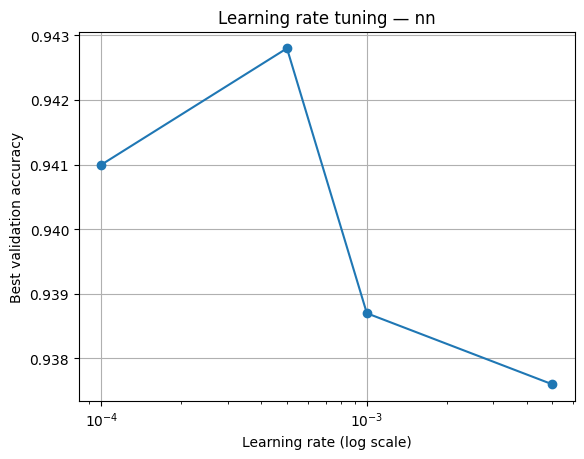


===== Tuning learning rate for nn2 =====

=== Training nn2_lr_0.0001 (132,353 params) ===
[nn2_lr_0.0001] Epoch 01 | Train Loss: 0.2378 Acc: 0.8987 | Eval Train Acc: 0.9375 | Eval Val Acc: 0.9350
[nn2_lr_0.0001] Epoch 02 | Train Loss: 0.1680 Acc: 0.9360 | Eval Train Acc: 0.9419 | Eval Val Acc: 0.9384
[nn2_lr_0.0001] Epoch 03 | Train Loss: 0.1611 Acc: 0.9378 | Eval Train Acc: 0.9409 | Eval Val Acc: 0.9356
[nn2_lr_0.0001] Epoch 04 | Train Loss: 0.1573 Acc: 0.9386 | Eval Train Acc: 0.9394 | Eval Val Acc: 0.9384
[nn2_lr_0.0001] Epoch 05 | Train Loss: 0.1551 Acc: 0.9394 | Eval Train Acc: 0.9419 | Eval Val Acc: 0.9345
Early stopping for nn2_lr_0.0001.

=== Training nn2_lr_0.0005 (132,353 params) ===
[nn2_lr_0.0005] Epoch 01 | Train Loss: 0.1858 Acc: 0.9269 | Eval Train Acc: 0.9398 | Eval Val Acc: 0.9383
[nn2_lr_0.0005] Epoch 02 | Train Loss: 0.1604 Acc: 0.9372 | Eval Train Acc: 0.9439 | Eval Val Acc: 0.9378
[nn2_lr_0.0005] Epoch 03 | Train Loss: 0.1569 Acc: 0.9386 | Eval Train Acc: 0.9416 |

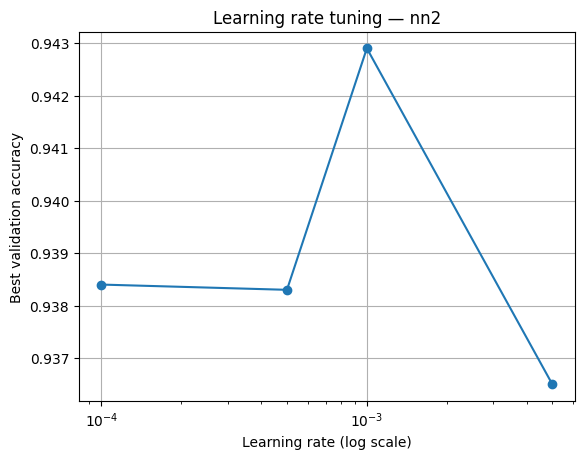


=== Best learning rate per model ===
+---------+------------+--------------------+
| Model   | Best LR    | Best Val Accuracy  |
+---------+------------+--------------------+
| linear  | 0.0005     |  94.10%            |
| nn      | 0.0005     |  94.28%            |
| nn2     | 0.001      |  94.29%            |
+---------+------------+--------------------+

Overall best: nn2 with lr=0.001 (val acc=0.9429)


In [4]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

from src.model import LinearBaseline, MentalHealthModelNN, MentalHealthModelNNv2
from src.dataset import MentalDataset
from src.trainer import MentalHealthTrainer, load_and_preprocess


def tune_learning_rate(
    model_cls,
    model_name: str,
    input_dim: int,
    train_set: MentalDataset,
    val_set: MentalDataset,
    trainer: MentalHealthTrainer,
    device: torch.device,
    learning_rates: list[float],
    weight_decay: float = 1e-4,
):
    """
    Tune le learning rate pour UN modèle (model_cls) et renvoie:
    - best_lr
    - best_val_acc
    - dict {lr: val_acc}
    """
    results = {}

    for lr in learning_rates:
        # IMPORTANT: recréer un modèle NEUF pour chaque lr
        model = model_cls(input_dim)

        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

        best_val = trainer.train(
            model=model,
            train_set=train_set,
            val_set=val_set,
            optimizer=optimizer,
            device=device,
            model_name=f"{model_name}_lr_{lr}",
        )

        results[lr] = best_val

    best_lr = max(results, key=results.get)
    best_val_acc = results[best_lr]
    return best_lr, best_val_acc, results


def plot_lr_curve(model_name: str, results: dict[float, float]):
    lrs = sorted(results.keys())
    accs = [results[lr] for lr in lrs]

    plt.figure()
    plt.plot(lrs, accs, marker="o")
    plt.xscale("log")
    plt.xlabel("Learning rate (log scale)")
    plt.ylabel("Best validation accuracy")
    plt.title(f"Learning rate tuning — {model_name}")
    plt.grid(True)
    plt.show()


def main():
    # 1) Prétraitement
    X_train, y_train, X_val, y_val, mean, std, feature_cols = load_and_preprocess("./data/train.csv")
    train_set = MentalDataset(X_train, y_train)
    val_set   = MentalDataset(X_val, y_val)

    input_dim = X_train.shape[1]
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    trainer = MentalHealthTrainer(
        batch_size=64,
        n_epochs=20,
        eval_samples=10_000,
    )

    # 2) Valeurs de LR testées
    learning_rates = [1e-4, 5e-4, 1e-3, 5e-3]

    # 3) Modèles à tuner (classe + nom)
    model_specs = [
        (LinearBaseline, "linear"),
        (MentalHealthModelNN, "nn"),
        (MentalHealthModelNNv2, "nn2"),
    ]

    best_summary = {}      # {name: (best_lr, best_val_acc)}
    all_results = {}       # {name: {lr: acc}}

    # 4) Tuning pour chaque modèle
    for model_cls, name in model_specs:
        print(f"\n===== Tuning learning rate for {name} =====")

        best_lr, best_acc, results = tune_learning_rate(
            model_cls=model_cls,
            model_name=name,
            input_dim=input_dim,
            train_set=train_set,
            val_set=val_set,
            trainer=trainer,
            device=device,
            learning_rates=learning_rates,
            weight_decay=1e-4,
        )

        best_summary[name] = (best_lr, best_acc)
        all_results[name] = results

        print(f"Best LR for {name}: {best_lr} | Best Val Acc: {best_acc:.4f}")

        # Courbe (utile pour ton rapport)
        plot_lr_curve(name, results)

    # 5) Tableau de comparaison final
    print("\n=== Best learning rate per model ===")
    print("+---------+------------+--------------------+")
    print("| Model   | Best LR    | Best Val Accuracy  |")
    print("+---------+------------+--------------------+")
    for name, (lr, acc) in best_summary.items():
        print(f"| {name:<7} | {lr:<10} | {acc*100:>6.2f}%            |")
    print("+---------+------------+--------------------+")

    # 6) Quel modèle gagne après tuning ?
    best_model_name = max(best_summary, key=lambda k: best_summary[k][1])
    best_lr, best_acc = best_summary[best_model_name]
    print(f"\nOverall best: {best_model_name} with lr={best_lr} (val acc={best_acc:.4f})")


if __name__ == "__main__":
    main()
